c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


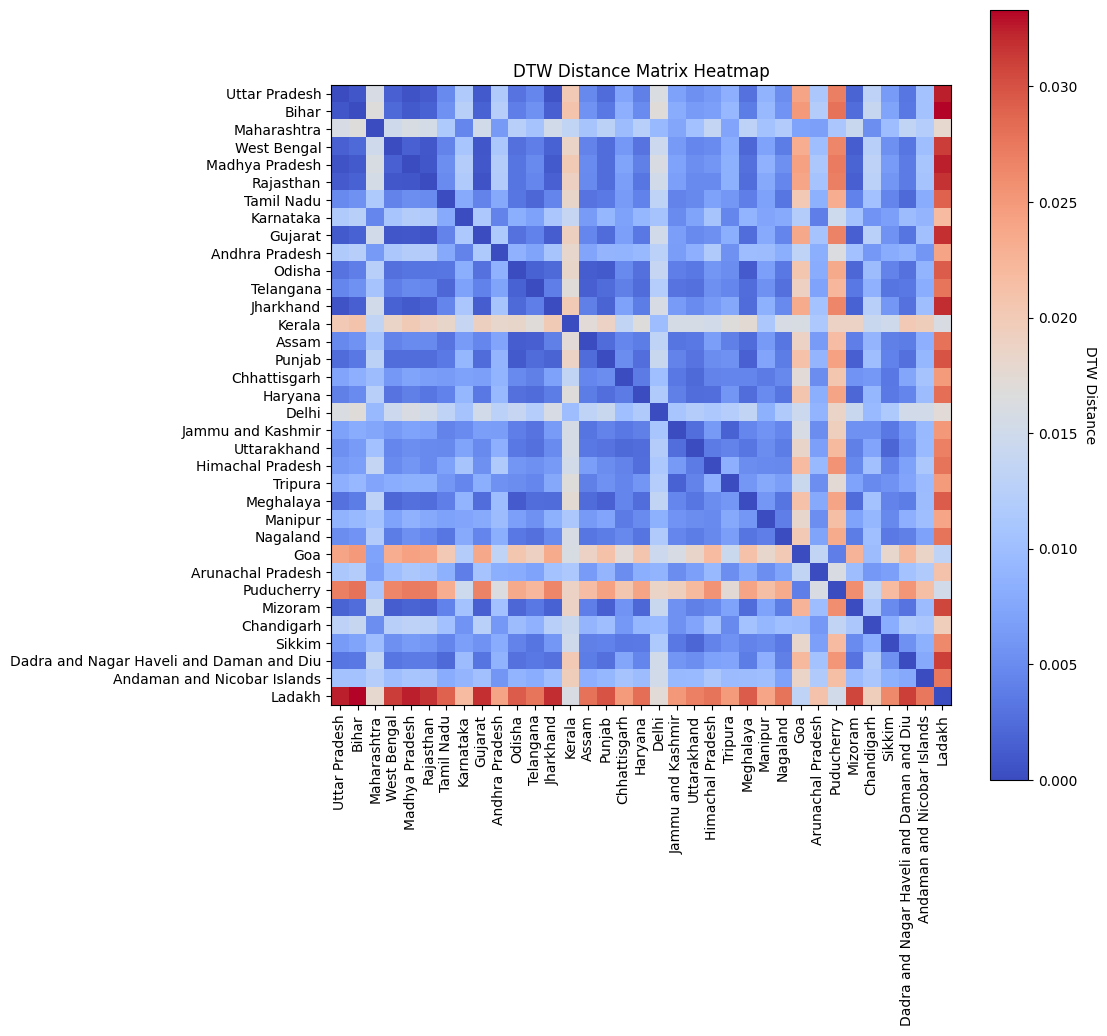

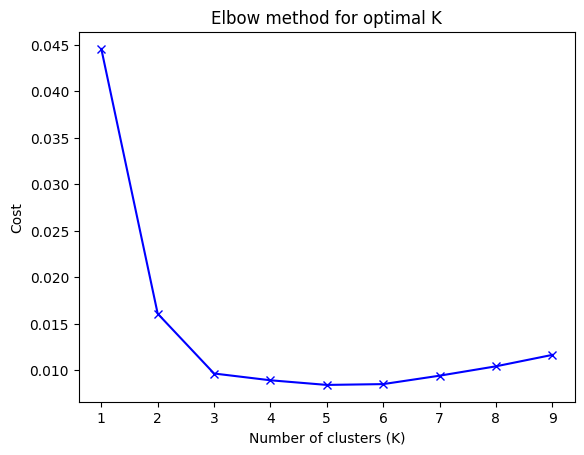

Optimum number of clusters: 5


c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:90: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


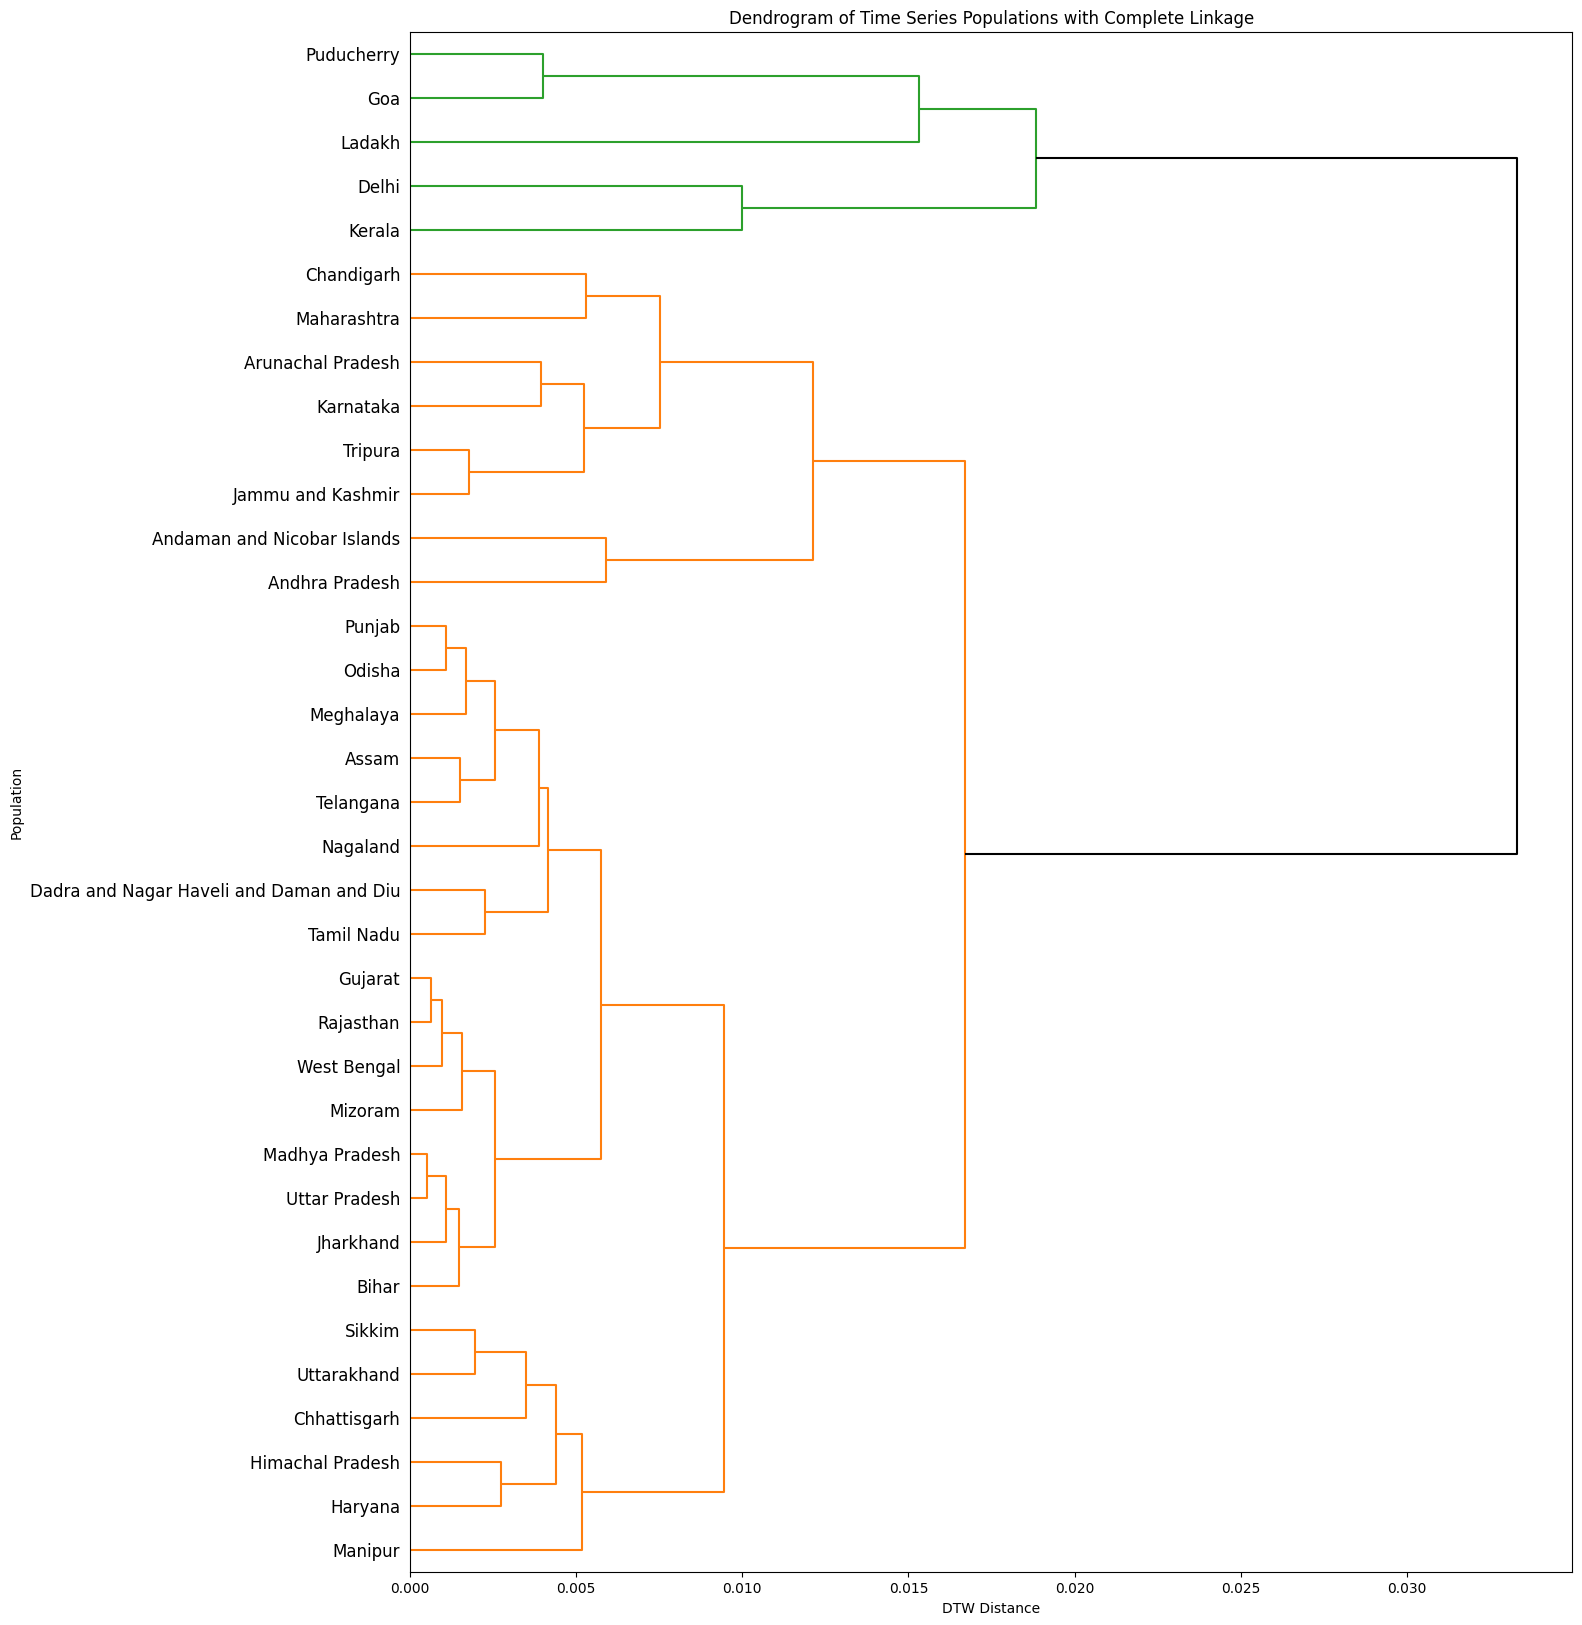

In [14]:
import pandas as pd
from tslearn.metrics import dtw
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\states.csv")

# Filter data for desired time period
start_date = '2020-07-01'
end_date = '2020-12-31'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df = df.loc[mask]

# Calculate case rates for each state
# Read population.csv file
dp = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\population.csv")

# Remove commas from Population column
dp['Population'] = dp['Population'].str.replace(',', '')

# Create a dictionary with state names as keys and population as values
populations = dict(zip(dp['State'], dp['Population'].astype(int)))
case_rates = {}
for state in populations:
    state_df = df.loc[df['State'] == state]
    state_df['Case Rate'] = (state_df['Confirmed'] - state_df['Recovered'] - state_df['Deceased'])/ populations[state]
    case_rates[state] = state_df[['Date', 'Case Rate']].reset_index(drop=True)
    # Update the original df with the 'Case Rate' column
    df.loc[df['State'] == state, 'Case Rate'] = state_df['Case Rate']

# assuming your case rate time series data is stored in a dataframe called 'df' with columns 'state' and 'case_rate'
case_rates = []
for state in populations:
    state_case_rates = df.loc[df['State'] == state]['Case Rate'].values
    case_rates.append(state_case_rates)

# calculate DTW distance matrix
dtw_dist_matrix = np.zeros((len(populations), len(populations)))
for i in range(len(populations)):
    for j in range(i+1, len(populations)):
        dtw_dist_matrix[i][j] = dtw(case_rates[i], case_rates[j], sakoe_chiba_radius=7)
        dtw_dist_matrix[j][i] = dtw_dist_matrix[i][j]
        
# Plot heatmap of dtw distance matrix
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(dtw_dist_matrix, cmap='coolwarm')

# Set x and y axis labels
ax.set_xticks(np.arange(len(populations)))
ax.set_yticks(np.arange(len(populations)))
ax.set_xticklabels(populations, rotation=90)
ax.set_yticklabels(populations)

# Create colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("DTW Distance", rotation=-90, va="bottom")

# Set plot title
ax.set_title("DTW Distance Matrix Heatmap")

# Show plot
plt.show()

# Calculate cost function for different values of K
costs = []
Ks = range(1, 10)
for K in Ks:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(dtw_dist_matrix)
    costs.append(kmeans.inertia_ + 0.5e-3*K*np.log(K))

# Plot the cost function vs. K
plt.plot(Ks, costs, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Cost')
plt.title('Elbow method for optimal K')
plt.show()

# optimum number of clusters
for i in range(9):
    if costs[i]==min(costs):
        print(f'Optimum number of clusters:', i+1)
    else:
        continue

# Calculate linkage matrix using complete linkage
linkage_matrix = linkage(dtw_dist_matrix, method='complete')

from scipy.spatial.distance import squareform

# Convert to condensed distance matrix
condensed_dist_matrix = squareform(dtw_dist_matrix)

# Compute linkage matrix using complete linkage
linkage_matrix = linkage(condensed_dist_matrix, method='complete')

# Plot dendrogram
fig, ax = plt.subplots(figsize=(15, 20))
dendrogram(linkage_matrix, labels=list(populations.keys()), orientation='right', color_threshold=None, above_threshold_color='k', leaf_font_size=12, leaf_rotation=0)
# Set plot title and labels
plt.title('Dendrogram of Time Series Populations with Complete Linkage')
plt.xlabel('DTW Distance')
plt.ylabel('Population')
plt.show()



c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


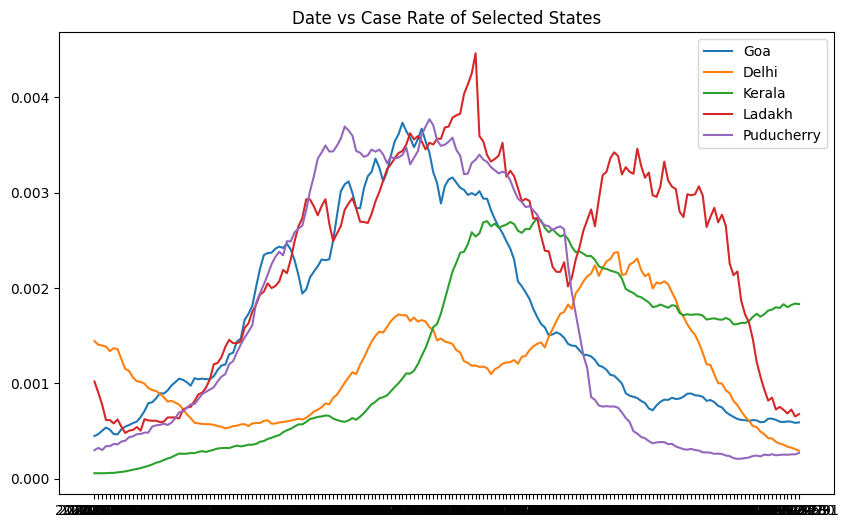

In [3]:
# Select the desired states
states = ['Goa', 'Delhi', 'Kerala', 'Ladakh', 'Puducherry']

# Create a list of dictionaries containing the case rate data for each state
case_rates = []
for state in states:
    state_df = df.loc[df['State'] == state]
    state_df['Case Rate'] = (state_df['Confirmed'] - state_df['Recovered'] - state_df['Deceased'])/ populations[state]
    state_data = {
        'State': state,
        'Case Rate': state_df[['Date', 'Case Rate']].reset_index(drop=True)
    }
    case_rates.append(state_data)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each state and plot the date vs case rate
for state in case_rates:
    state_name = state['State']
    state_df = state['Case Rate']
    ax.plot(state_df['Date'], state_df['Case Rate'], label=state_name)

# Add a title and legend to the plot
ax.set_title('Date vs Case Rate of Selected States')
ax.legend()

# Show the plot
plt.show()

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


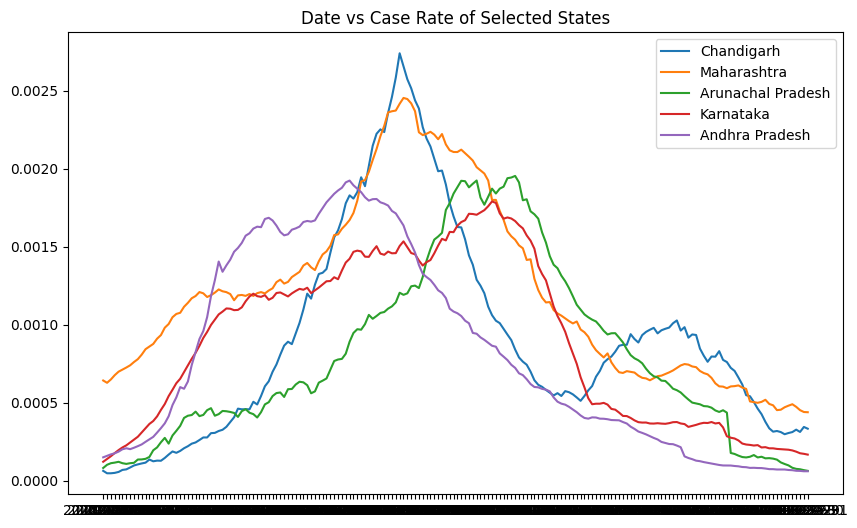

In [17]:
# Select the desired states
states = ['Chandigarh', 'Maharashtra', 'Arunachal Pradesh', 'Karnataka', 'Andhra Pradesh']

# Create a list of dictionaries containing the case rate data for each state
case_rates = []
for state in states:
    state_df = df.loc[df['State'] == state]
    state_df['Case Rate'] = (state_df['Confirmed'] - state_df['Recovered'] - state_df['Deceased'])/ populations[state]
    state_data = {
        'State': state,
        'Case Rate': state_df[['Date', 'Case Rate']].reset_index(drop=True)
    }
    case_rates.append(state_data)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each state and plot the date vs case rate
for state in case_rates:
    state_name = state['State']
    state_df = state['Case Rate']
    ax.plot(state_df['Date'], state_df['Case Rate'], label=state_name)

# Add a title and legend to the plot
ax.set_title('Date vs Case Rate of Selected States')
ax.legend()

# Show the plot
plt.show()

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


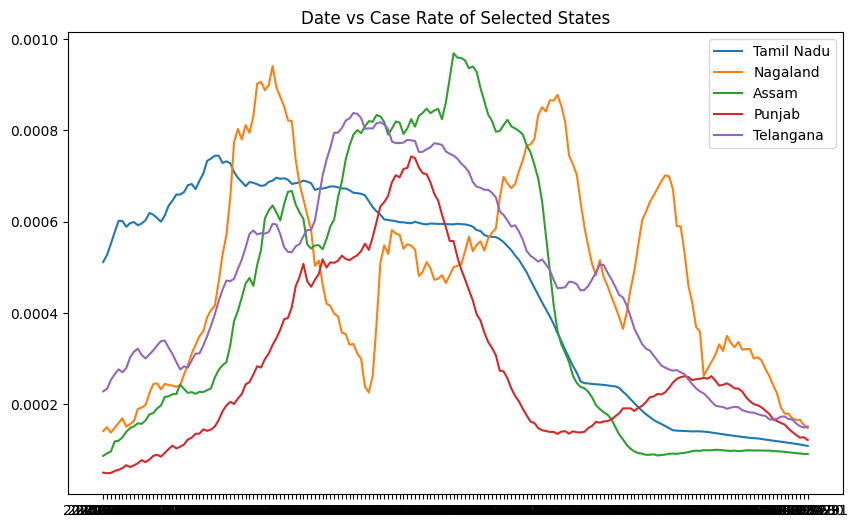

In [19]:
# Select the desired states
states = ['Tamil Nadu', 'Nagaland', 'Assam', 'Punjab', 'Telangana']

# Create a list of dictionaries containing the case rate data for each state
case_rates = []
for state in states:
    state_df = df.loc[df['State'] == state]
    state_df['Case Rate'] = (state_df['Confirmed'] - state_df['Recovered'] - state_df['Deceased'])/ populations[state]
    state_data = {
        'State': state,
        'Case Rate': state_df[['Date', 'Case Rate']].reset_index(drop=True)
    }
    case_rates.append(state_data)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each state and plot the date vs case rate
for state in case_rates:
    state_name = state['State']
    state_df = state['Case Rate']
    ax.plot(state_df['Date'], state_df['Case Rate'], label=state_name)

# Add a title and legend to the plot
ax.set_title('Date vs Case Rate of Selected States')
ax.legend()

# Show the plot
plt.show()

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


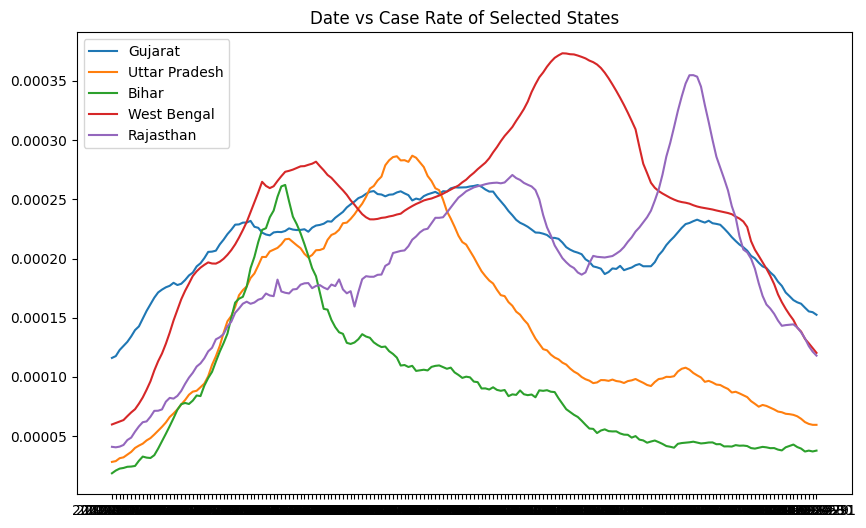

In [20]:
# Select the desired states
states = ['Gujarat', 'Uttar Pradesh', 'Bihar', 'West Bengal', 'Rajasthan']

# Create a list of dictionaries containing the case rate data for each state
case_rates = []
for state in states:
    state_df = df.loc[df['State'] == state]
    state_df['Case Rate'] = (state_df['Confirmed'] - state_df['Recovered'] - state_df['Deceased'])/ populations[state]
    state_data = {
        'State': state,
        'Case Rate': state_df[['Date', 'Case Rate']].reset_index(drop=True)
    }
    case_rates.append(state_data)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each state and plot the date vs case rate
for state in case_rates:
    state_name = state['State']
    state_df = state['Case Rate']
    ax.plot(state_df['Date'], state_df['Case Rate'], label=state_name)

# Add a title and legend to the plot
ax.set_title('Date vs Case Rate of Selected States')
ax.legend()

# Show the plot
plt.show()

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


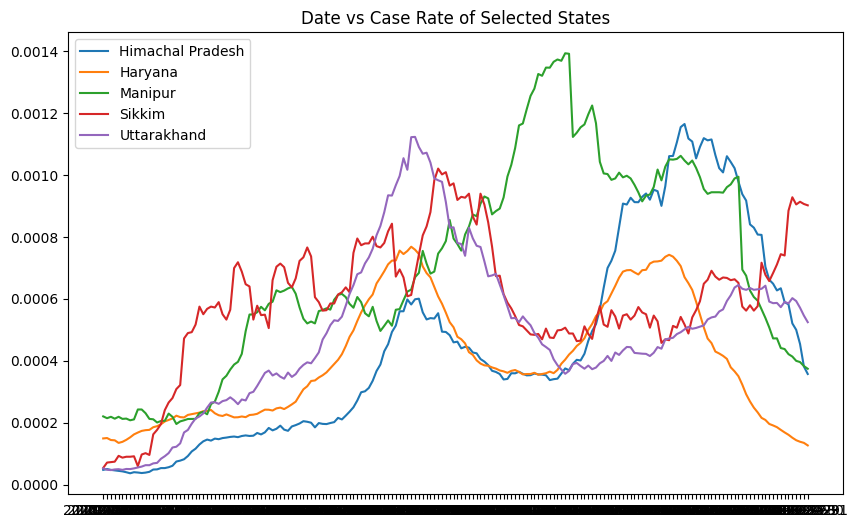

In [21]:
# Select the desired states
states = ['Himachal Pradesh', 'Haryana', 'Manipur', 'Sikkim', 'Uttarakhand']

# Create a list of dictionaries containing the case rate data for each state
case_rates = []
for state in states:
    state_df = df.loc[df['State'] == state]
    state_df['Case Rate'] = (state_df['Confirmed'] - state_df['Recovered'] - state_df['Deceased'])/ populations[state]
    state_data = {
        'State': state,
        'Case Rate': state_df[['Date', 'Case Rate']].reset_index(drop=True)
    }
    case_rates.append(state_data)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each state and plot the date vs case rate
for state in case_rates:
    state_name = state['State']
    state_df = state['Case Rate']
    ax.plot(state_df['Date'], state_df['Case Rate'], label=state_name)

# Add a title and legend to the plot
ax.set_title('Date vs Case Rate of Selected States')
ax.legend()

# Show the plot
plt.show()

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


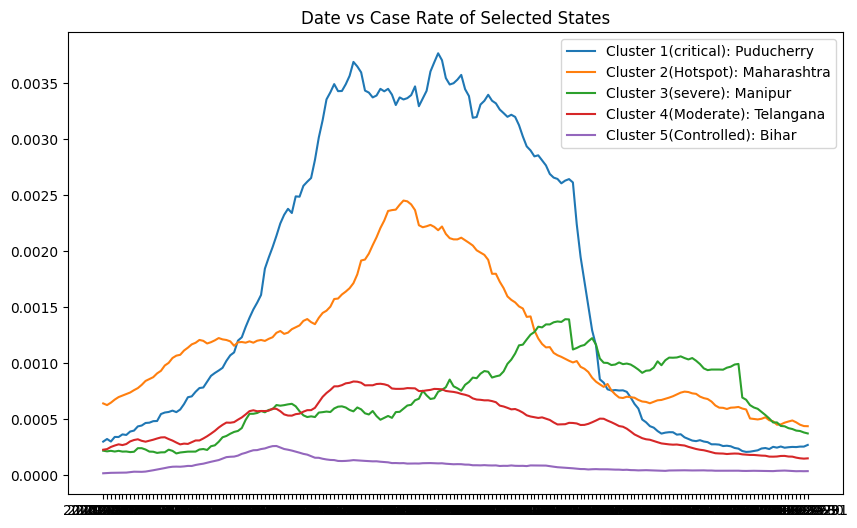

In [28]:
# Select the desired states
states = ['Puducherry', 'Maharashtra', 'Manipur', 'Telangana', 'Bihar']

# Create a list of dictionaries containing the case rate data for each state
case_rates = []
for state in states:
    state_df = df.loc[df['State'] == state]
    state_df['Case Rate'] = (state_df['Confirmed'] - state_df['Recovered'] - state_df['Deceased'])/ populations[state]
    state_data = {
        'State': state,
        'Case Rate': state_df[['Date', 'Case Rate']].reset_index(drop=True)
    }
    case_rates.append(state_data)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each state and plot the date vs case rate
for state in case_rates:
    state_name = state['State']
    state_df = state['Case Rate']
    
    # Add labels based on the state
    if state_name == 'Puducherry':
        ax.plot(state_df['Date'], state_df['Case Rate'], label='Cluster 1(critical): Puducherry')
    elif state_name == 'Maharashtra':
        ax.plot(state_df['Date'], state_df['Case Rate'], label='Cluster 2(Hotspot): Maharashtra')
    elif state_name == 'Manipur':
        ax.plot(state_df['Date'], state_df['Case Rate'], label='Cluster 3(severe): Manipur')
    elif state_name == 'Telangana':
        ax.plot(state_df['Date'], state_df['Case Rate'], label='Cluster 4(Moderate): Telangana')
    elif state_name == 'Bihar':
        ax.plot(state_df['Date'], state_df['Case Rate'], label='Cluster 5(Controlled): Bihar')

# Add a title and legend to the plot
ax.set_title('Date vs Case Rate of Selected States')
ax.legend()

# Show the plot
plt.show()

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


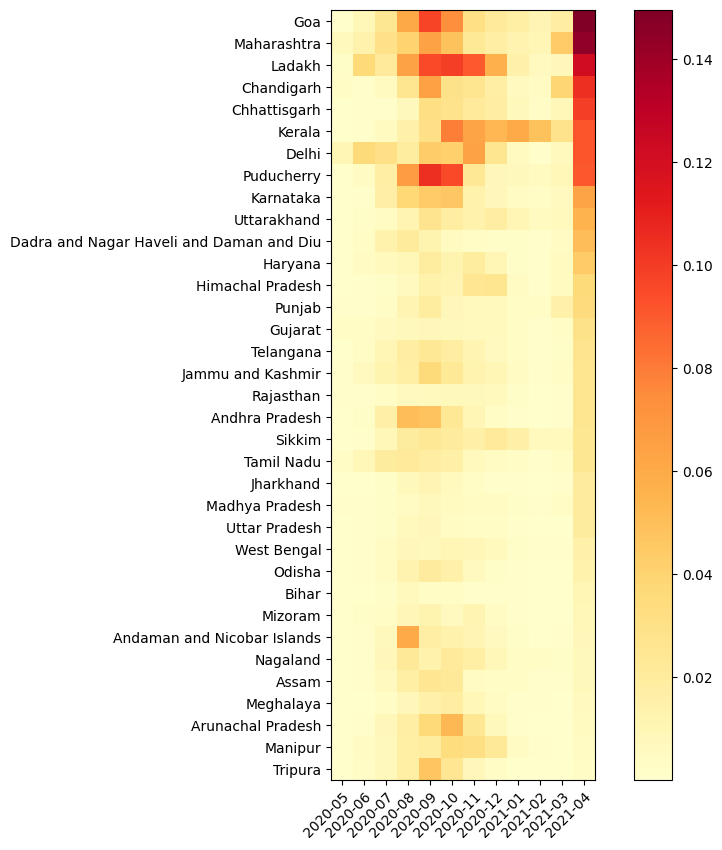

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\states.csv")
dp = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\population.csv")
dp['Population'] = dp['Population'].str.replace(',', '')

# Create a dictionary with state names as keys and population as values
populations = dict(zip(dp['State'], dp['Population'].astype(int)))
# Filter data for desired time period
start_date = '2020-05-01'
end_date = '2021-04-30'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df = df.loc[mask]

# Calculate monthly case rates for each state
monthly_case_rates = {}
for state in populations:
    state_df = df.loc[df['State'] == state]
    state_df['Monthly'] = pd.to_datetime(state_df['Date']).dt.to_period('M')
    monthly_case_rates[state] = state_df.groupby('Monthly')['Confirmed', 'Recovered', 'Deceased'].sum().apply(lambda x: (x['Confirmed'] - x['Recovered'] - x['Deceased']) / populations[state], axis=1)

# Create a pivot table with the mean monthly case rates for each state
mean_monthly_case_rates = pd.pivot_table(pd.concat(monthly_case_rates, axis=1), index='Monthly', aggfunc='mean').T

# Sort the mean monthly case rates in descending order
mean_monthly_case_rates = mean_monthly_case_rates.sort_values(mean_monthly_case_rates.columns[-1], ascending=False)

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(mean_monthly_case_rates.values, cmap='YlOrRd')

# Customize the heatmap
ax.set_xticks(np.arange(len(mean_monthly_case_rates.columns)))
ax.set_yticks(np.arange(len(mean_monthly_case_rates.index)))
ax.set_xticklabels(mean_monthly_case_rates.columns)
ax.set_yticklabels(mean_monthly_case_rates.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.colorbar(im)
plt.show()

c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
c:\users\dishant\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:57: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


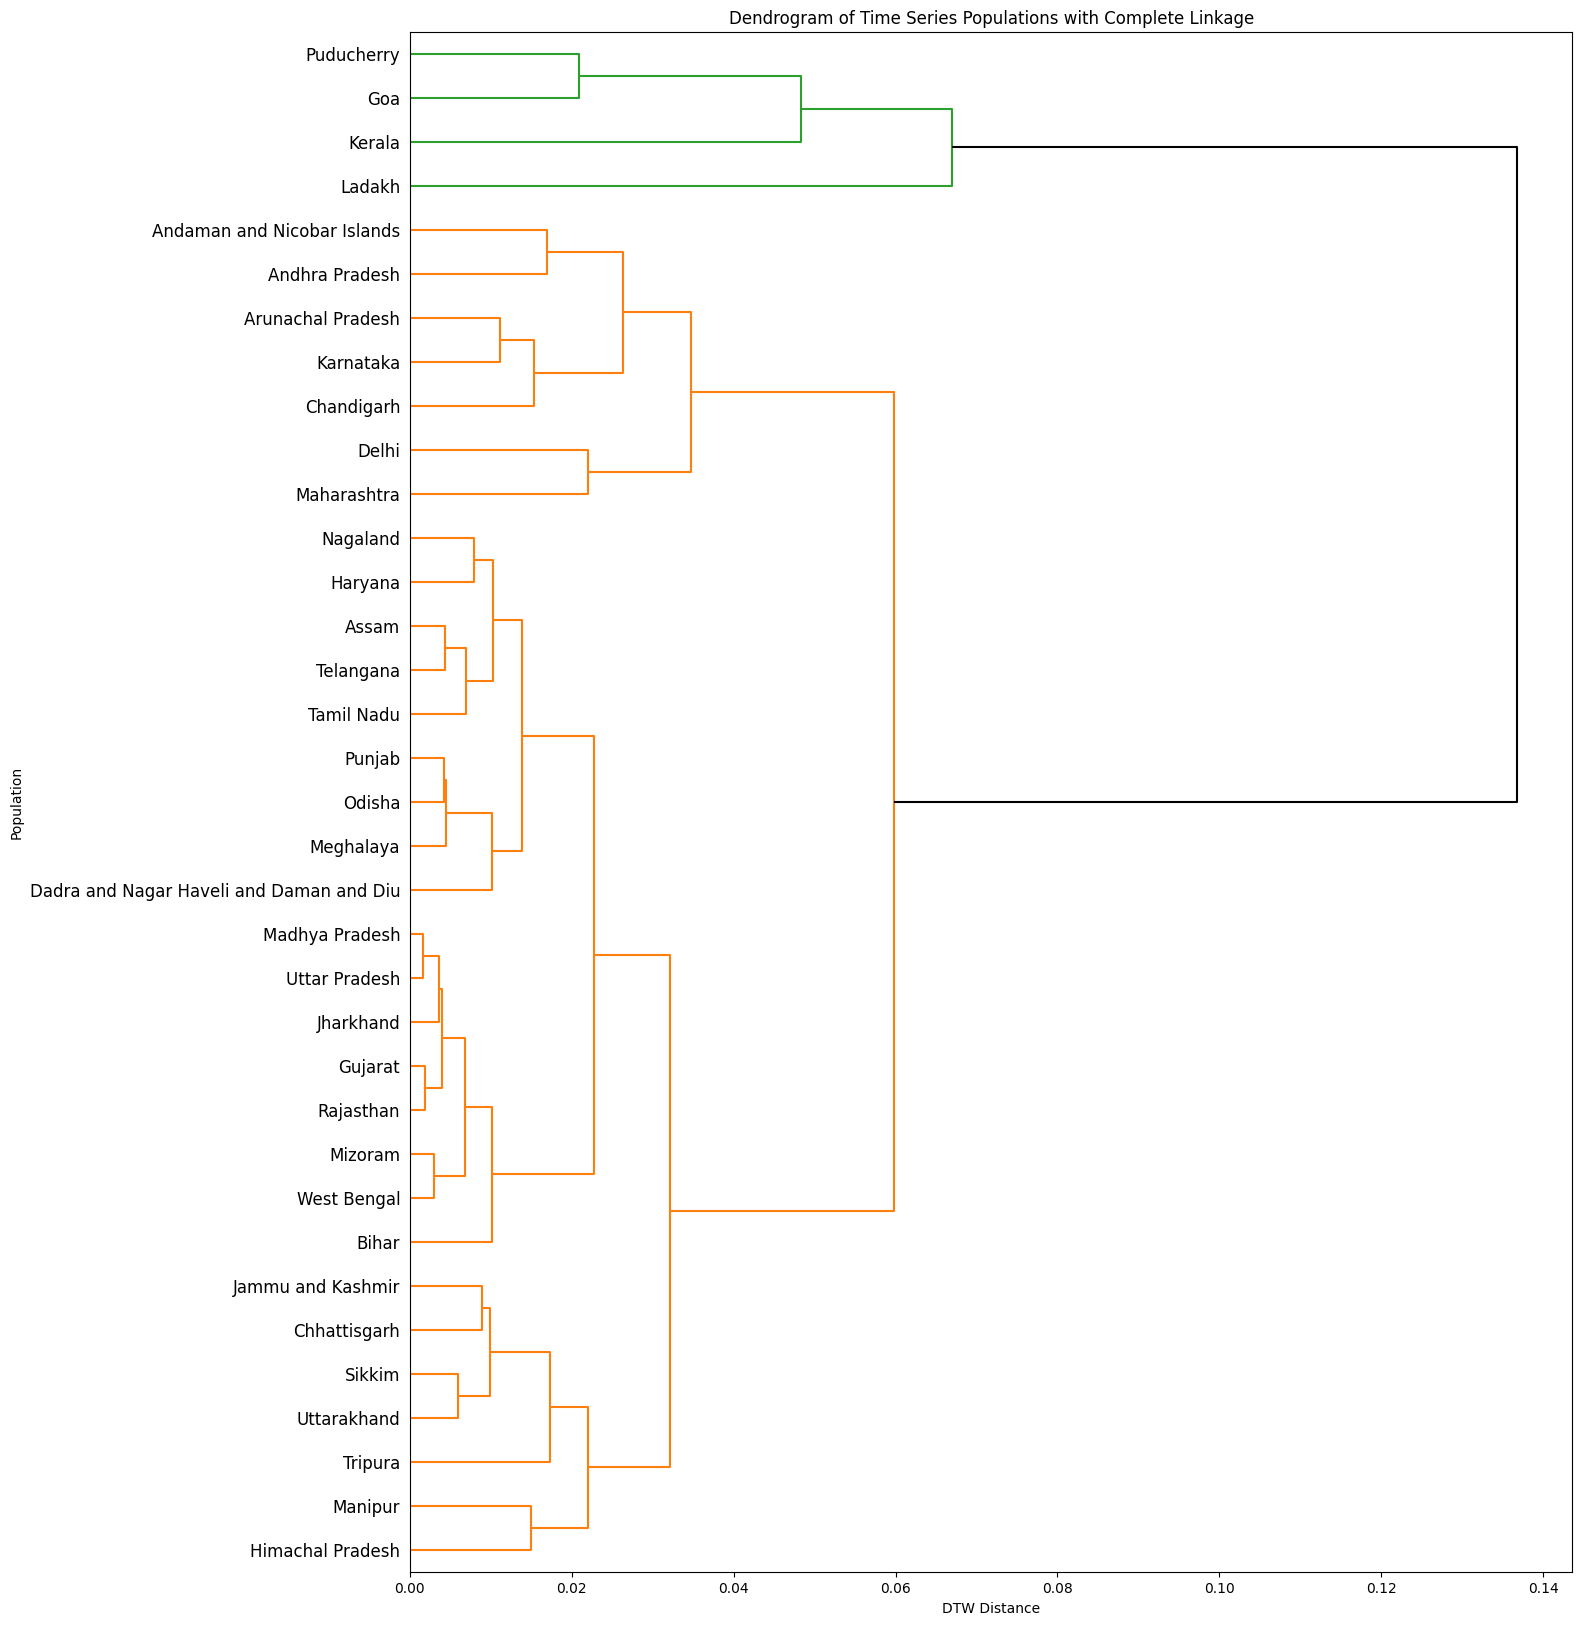

In [13]:
import pandas as pd
from tslearn.metrics import dtw
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean

df = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\states.csv")

# Filter data for desired time period
start_date = '2020-07-01'
end_date = '2020-12-31'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df = df.loc[mask]

# Calculate case rates for each state
# Read population.csv file
dp = pd.read_csv(r"C:\Users\Dishant\Desktop\Untitled Folder\population.csv")

# Remove commas from Population column
dp['Population'] = dp['Population'].str.replace(',', '')

# Create a dictionary with state names as keys and population as values
populations = dict(zip(dp['State'], dp['Population'].astype(int)))
case_rates = {}
for state in populations:
    state_df = df.loc[df['State'] == state]
    state_df['Case Rate'] = (state_df['Confirmed'] - state_df['Recovered'] - state_df['Deceased'])/ populations[state]
    case_rates[state] = state_df[['Date', 'Case Rate']].reset_index(drop=True)
    # Update the original df with the 'Case Rate' column
    df.loc[df['State'] == state, 'Case Rate'] = state_df['Case Rate']

# assuming your case rate time series data is stored in a dataframe called 'df' with columns 'state' and 'case_rate'
case_rates = []
for state in populations:
    state_case_rates = df.loc[df['State'] == state]['Case Rate'].values
    case_rates.append(state_case_rates)

# calculate Euclidean distance matrix
euclidean_dist_matrix = np.zeros((len(populations), len(populations)))
for i in range(len(populations)):
    for j in range(i+1, len(populations)):
        euclidean_dist_matrix[i][j] = euclidean(case_rates[i], case_rates[j])
        euclidean_dist_matrix[j][i] = euclidean_dist_matrix[i][j]

# Calculate linkage matrix using complete linkage
linkage_matrix = linkage(euclidean_dist_matrix, method='complete')

from scipy.spatial.distance import squareform

# Convert to condensed distance matrix
condensed_dist_matrix = squareform(euclidean_dist_matrix)

# Compute linkage matrix using complete linkage
linkage_matrix = linkage(euclidean_dist_matrix, method='complete')

# Plot dendrogram
fig, ax = plt.subplots(figsize=(15, 20))
dendrogram(linkage_matrix, labels=list(populations.keys()), orientation='right', color_threshold=None, above_threshold_color='k', leaf_font_size=12, leaf_rotation=0)
# Set plot title and labels
plt.title('Dendrogram of Time Series Populations with Complete Linkage')
plt.xlabel('DTW Distance')
plt.ylabel('Population')
plt.show()
